#**Mounting on Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!ls "/content/drive/MyDrive/"

'3553f488-9764-443b-aa86-3c72fbd5270f (1).pdf'
 3553f488-9764-443b-aa86-3c72fbd5270f.pdf
'Aalekh_Website_Assets '
 ab49b6f2-adc2-4200-ba0a-217e7c86071c.pdf
'ABC company intership offer letter.gdoc'
'AIPPM PORTFOLIO SHEET.gsheet'
'Buisness Analyst (resume).gdoc'
 Bu_Stuff
'CEREBRUM OPEN MIC Registration Form .gform'
 ChestX-Ray.zip
 Classroom
'Colab Notebooks'
'COVER LETTER.gdoc'
'D5200 Images'
'DevOps-Presentation(Commands).gdoc'
'Geo Map Expressions .xlsx'
'Global Assets Cost - 2023 Updated 25-07-23.xlsx'
 IMG_20191116_180333.jpg
 IMG-20191123-WA0002.jpg
 IMG-20250718-WA0006.jpg
'IMG-20250718-WA0008 (1).jpg'
 IMG-20250718-WA0008.jpg
'Kunal Bose'
'Kunalbose 6.1.2.ipynb'
'Kunal Bose(Accredian-Internship_Assignment).ipynb'
'Kunal Bose Linkden profile.pdf'
'Kunal Bose Resume (1).pdf'
'Kunal Bose Resume (2).pdf'
'Kunal Bose Resume.pdf'
'Kunal Bose Week 6 Assignment 6.1.1.ipynb'
 Kunalbose_week_6_Assignment6.1.2.ipynb
'Mail Reply APS Principal.gdoc'
 Me
'OLD Resume Kunal Bose.gdoc'
 Resume.

In [17]:
!unzip "/content/drive/MyDrive/ChestX-Ray.zip" -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: /content/chest_xray/train/NORMAL/IM-0445-0001.jpeg  


In [18]:
!ls /content/

chest_xray  drive  sample_data


In [19]:
import os

base_dir = "/content/chest_xray"   # or /content/ChestX-Ray (check with !ls output)

print("Contents of base_dir:", os.listdir(base_dir))

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")

print("Train:", os.listdir(train_dir))
print("Val:", os.listdir(val_dir))
print("Test:", os.listdir(test_dir))

Contents of base_dir: ['test', 'train', 'chest_xray', 'val', '__MACOSX']
Train: ['NORMAL', 'PNEUMONIA']
Val: ['NORMAL', 'PNEUMONIA']
Test: ['NORMAL', 'PNEUMONIA']


#**Processing the Data**

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode="binary"
)
val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(224,224), batch_size=32, class_mode="binary"
)
test_gen = test_datagen.flow_from_directory(
    test_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#**Building the Model (*ResNet50 Transfer Learning*)**

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

#**Training the Model**

In [22]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 910s 6s/step - accuracy: 0.6812 - loss: 0.6521 - val_accuracy: 0.5000 - val_loss: 0.7983
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 899s 6s/step - accuracy: 0.7445 - loss: 0.5633 - val_accuracy: 0.5000 - val_loss: 0.8206
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 900s 6s/step - accuracy: 0.7439 - loss: 0.5371 - val_accuracy: 0.5000 - val_loss: 0.7927
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 902s 6s/step - accuracy: 0.7507 - loss: 0.5176 - val_accuracy: 0.5000 - val_loss: 0.7433
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 903s 6s/step - accuracy: 0.7536 - loss: 0.5048 - val_accuracy: 0.5000 - val_loss: 0.7940


#**Evaluating on Test Data**

In [23]:
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.3046 - loss: 0.9460
Test Accuracy: 62.98%


#**Using Grad-CAM for more Explainability**

In [24]:
import numpy as np, cv2, matplotlib.pyplot as plt

def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

#**Picking one test image**

In [25]:
img_path = test_gen.filepaths[0]
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


#**Generated Grad-CAM**

In [26]:
heatmap = get_gradcam_heatmap(img_array, model, "conv5_block3_out")


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


#**Display**

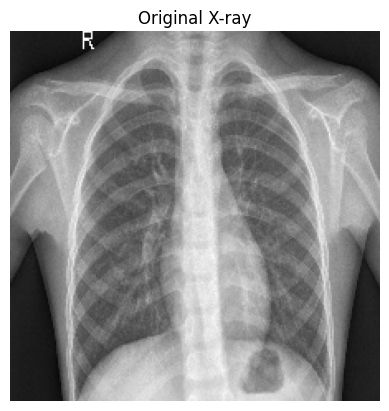

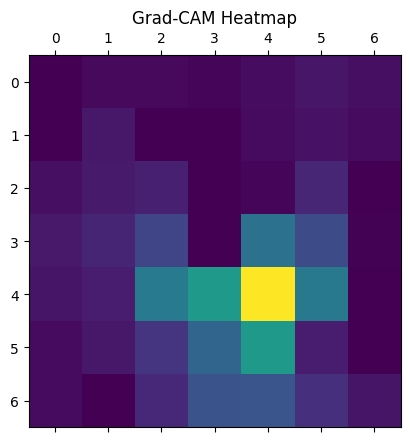

In [27]:
plt.imshow(img)
plt.axis("off")
plt.title("Original X-ray")
plt.show()

plt.matshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.show()


#**Overlaying heatmap on original**

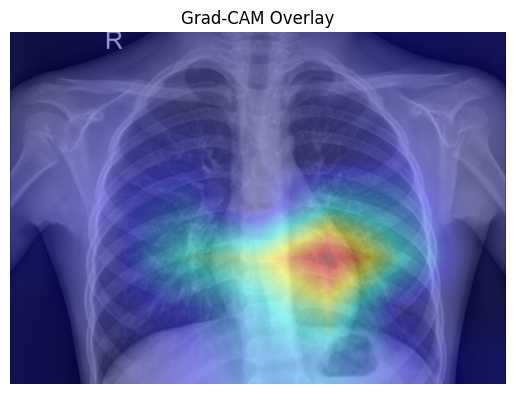

In [28]:
img_cv = cv2.imread(img_path)
heatmap_resized = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
heatmap_resized = np.uint8(255 * heatmap_resized)
heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_cv, 0.6, heatmap_colored, 0.4, 0)

cv2.imwrite("gradcam_result.jpg", superimposed_img)

plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Grad-CAM Overlay")
plt.show()

#**Predictions on Test Set**

In [29]:
preds = model.predict(test_gen)
pred_labels = (preds > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_gen.classes, pred_labels, target_names=["Normal", "Pneumonia"]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step
              precision    recall  f1-score   support

      Normal       1.00      0.01      0.03       234
   Pneumonia       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.81      0.51      0.40       624
weighted avg       0.77      0.63      0.49       624

